In [ ]:

import cv2 #load our images
import matplotlib.pyplot as plt #plot them,

from utils import *  #module that contains some helper functions
from darknet import Darknet #modified version of *Darknet*. YOLO uses *Darknet*,an open source, deep neural network framework written by the creators of YOLO.

In [ ]:
# Set the location and name of the cfg file that contains the network architecture
cfg_file = 'yolov3.cfg'

# Set the location and name of the pre-trained weights file that contains the pre-trained weights
weight_file = 'yolov3.weights'

# Set the location and name of COCO object classes file that has the list of the 80 object classes that the weights were trained to detect.
namesfile = 'coco.names'

# Load the network architecture
m = Darknet(cfg_file)

# Load the pre-trained weights
m.load_weights(weight_file)

# Load the COCO object classes
class_names = load_class_names(namesfile)

In [ ]:
# Print the neural network used in YOLOv3
m.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1

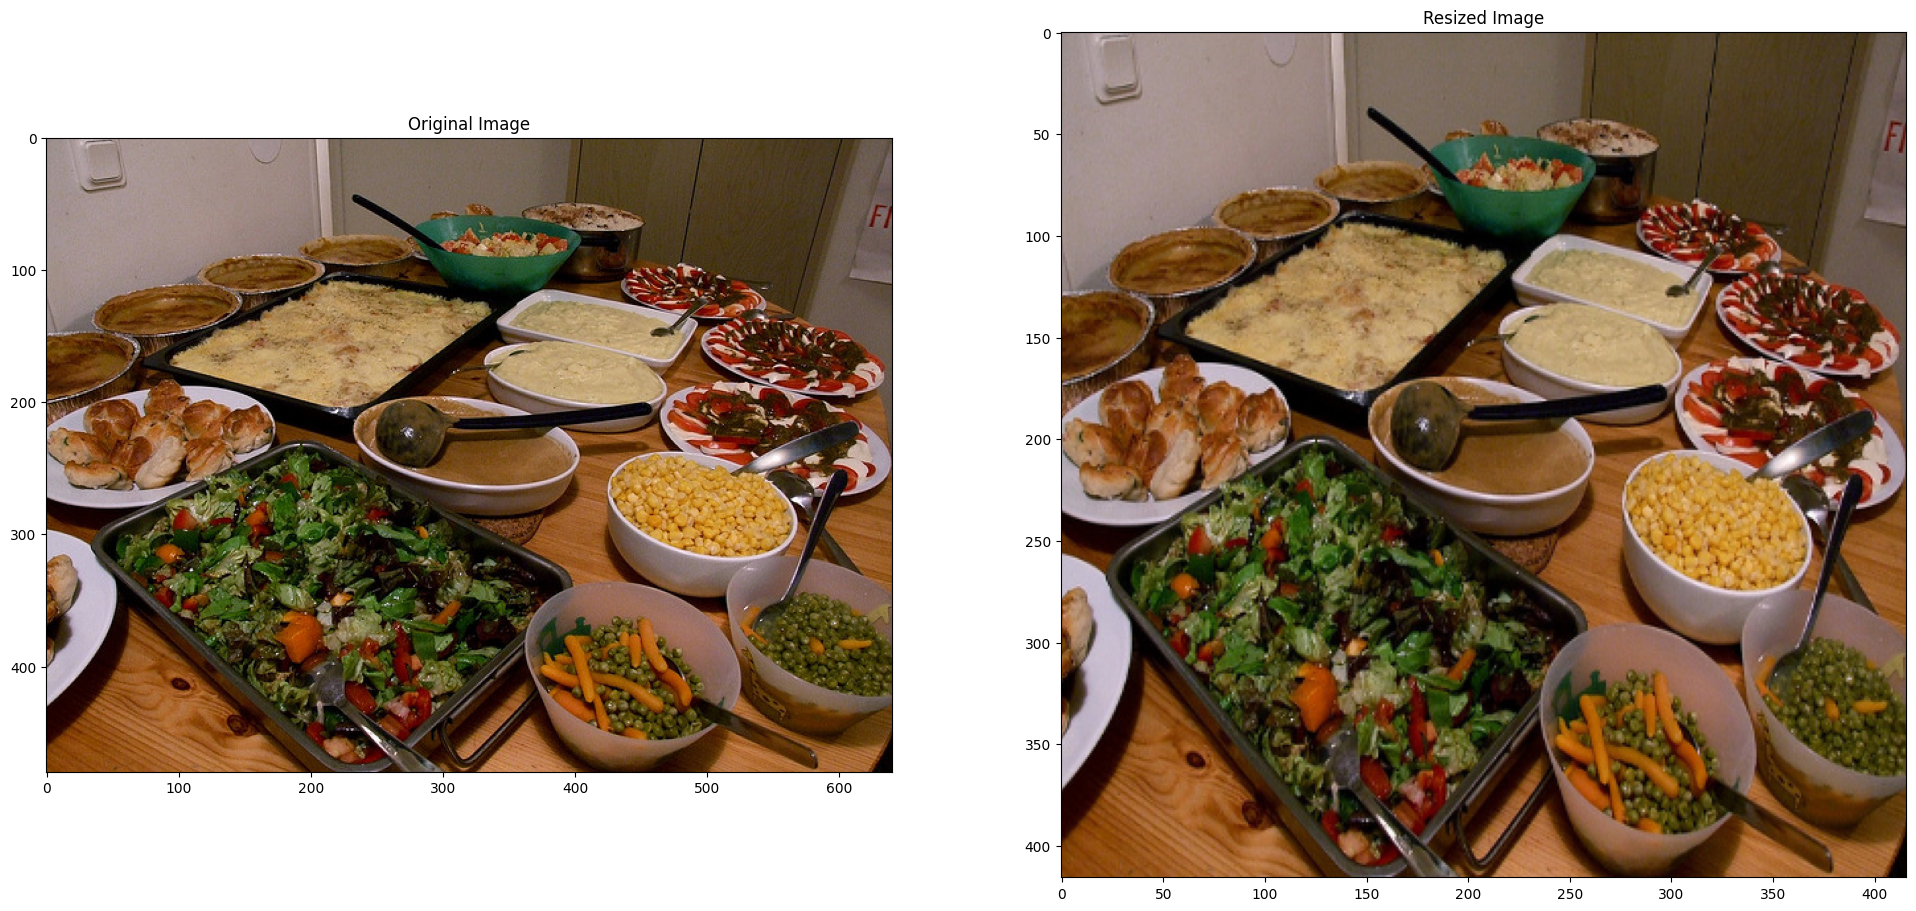

In [15]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# load our images using OpenCV's cv2.imread() function.
img = cv2.imread('food.jpg')

# #Since, this function loads images as BGR we will convert our images to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# We resize the image to the input width and height of the first layer of the network ie 416 x 416 x 3.
resized_image = cv2.resize(original_image, (m.width, m.height))

# Display the images
plt.subplot(121)
plt.title('Original Image')
plt.imshow(original_image)
plt.subplot(122)
plt.title('Resized Image')
plt.imshow(resized_image)
plt.show()


In [16]:
# Set the NMS threshold
nms_thresh = 0.8


In [17]:
# Set the IOU threshold
iou_thresh = 0.6




It took 2.202 seconds to detect the objects in the image.

Number of Objects Detected: 12 

Objects Found and Confidence Level:

1. bowl: 0.999978
2. bowl: 0.999683
3. bowl: 0.999968
4. bowl: 0.999995
5. spoon: 0.996658
6. bowl: 0.999998
7. bowl: 0.999984
8. spoon: 0.999949
9. diningtable: 0.999985
10. bowl: 0.999991
11. bowl: 0.999346
12. spoon: 0.999407


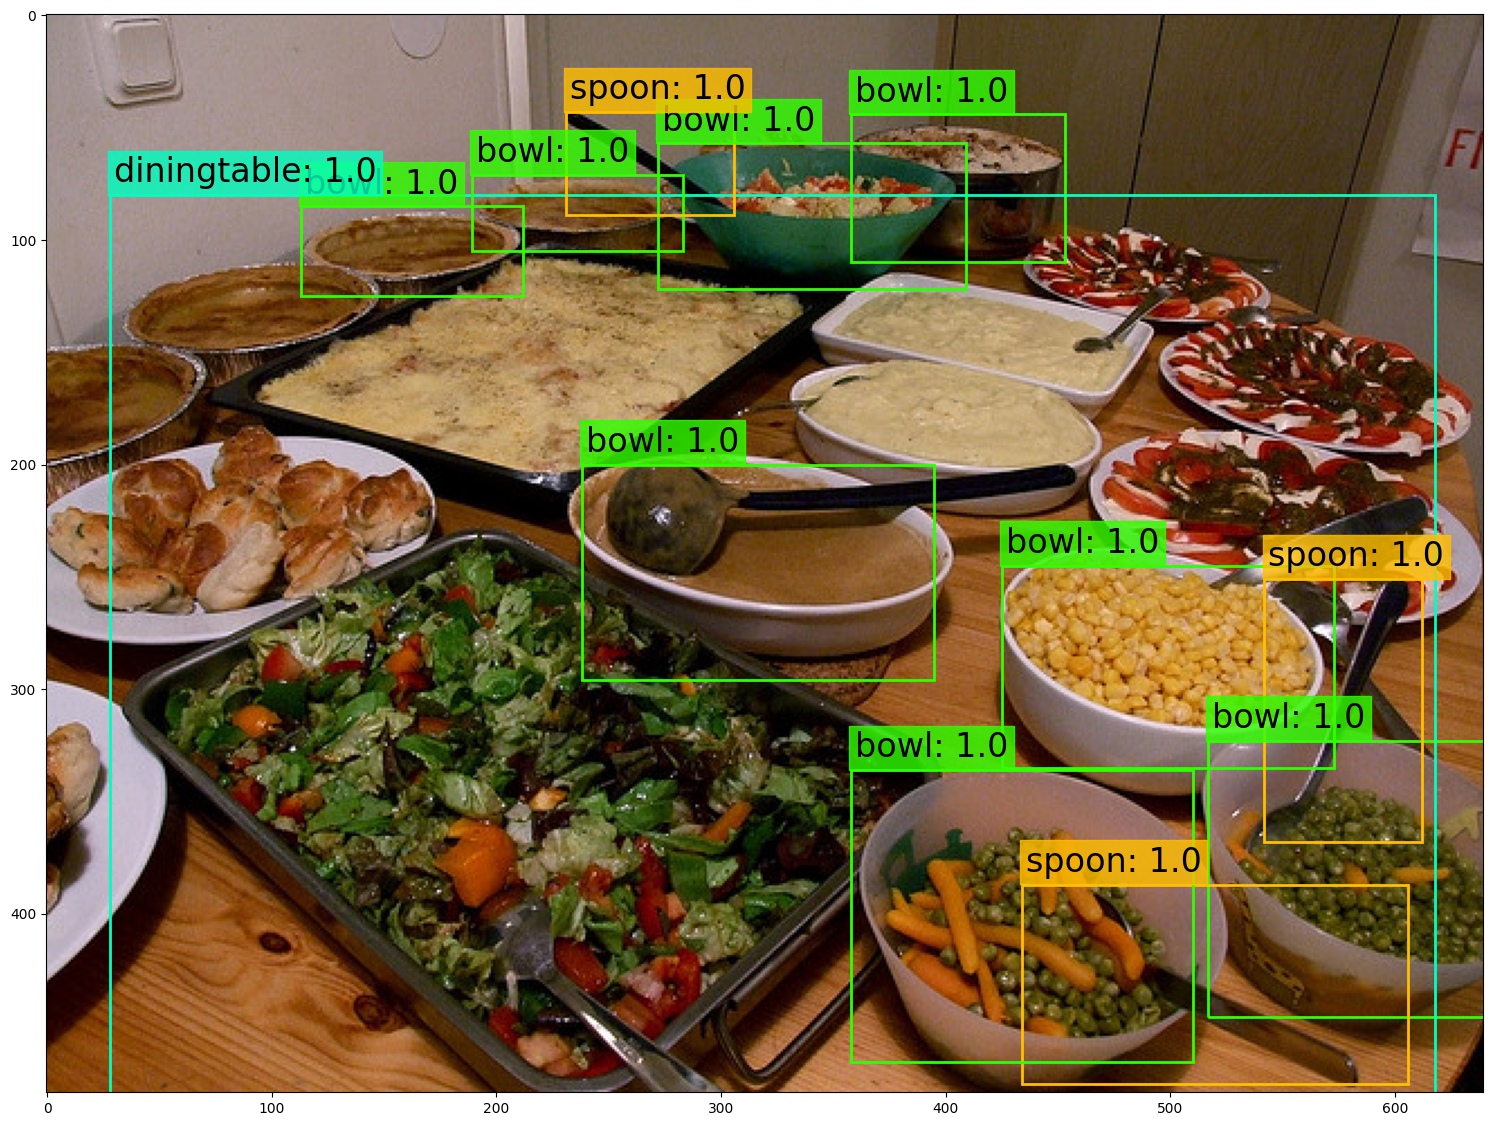

In [18]:
# Detect objects in the image
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

# Print the objects found and the confidence level
print_objects(boxes, class_names)

#Plot the image with bounding boxes and corresponding object class labels
plot_boxes(original_image, boxes, class_names, plot_labels = True)